In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [19]:
df=pd.read_csv("OSD-457_DGE (1).csv")

In [20]:
df

,ENSEMBL,Symbol,LOG2FC,PVAL,ADJP
0,ENSMUSG00000000001,Gnai3,0.726119,1.004303e-15,3.962346e-15
1,ENSMUSG00000000126,Wnt9a,-2.209758,5.617134e-15,2.144766e-14
2,ENSMUSG00000000214,Th,-7.998439,2.086363e-15,8.106912e-15
3,ENSMUSG00000000318,Clec10a,2.986602,1.642898e-14,6.176906e-14
4,ENSMUSG00000000346,Dazap2,0.413775,1.452395e-13,5.233603e-13
...,...,...,...,...,...
27727,ENSMUSG00002076348,NaN,0.000000,1.000000e+00,1.000000e+00
27728,ENSMUSG00002076445,NaN,0.000000,1.000000e+00,1.000000e+00
27729,ENSMUSG00002076636,NaN,0.000000,1.000000e+00,1.000000e+00
27730,ENSMUSG00002076650,NaN,0.000000,1.000000e+00,1.000000e+00


In [21]:
df['Symbol'][1][0:3]=='Wnt'


True

In [22]:
df['-LOG10_ADJP']=-np.log(df['ADJP'])

C:\Users\Akshat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [23]:
df['SUM']=df['-LOG10_ADJP']+df['LOG2FC']

In [24]:
cyp_indices = df[df['Symbol'].str[:3] == 'Cyp'].index.to_list()

In [25]:
cyp_indices

[1037,
 1099,
 1348,
 2267,
 2276,
 2277,
 2581,
 3519,
 3750,
 3856,
 4675,
 5547,
 6608,
 6674,
 7042,
 7282,
 7529,
 8413,
 8446,
 8621,
 9482,
 10955,
 11138,
 11364,
 12389,
 12814,
 13065,
 13173,
 13290,
 13318,
 13321,
 13821,
 14176,
 14828,
 14893,
 15067,
 15610,
 15700,
 15798,
 16435,
 16819,
 16981,
 17035,
 17389,
 17591,
 17677,
 17753,
 18022,
 18193,
 18265,
 18810,
 18953,
 19161,
 19975,
 19995,
 20338,
 20347,
 20472,
 20499,
 20723,
 20790,
 20892,
 21260,
 21383,
 21507,
 21932,
 22115,
 22516,
 23229,
 24619,
 25001,
 25569,
 25607,
 25902,
 26017,
 26019,
 26075,
 26320,
 26321,
 26424,
 26426,
 26472,
 26503,
 26544,
 26550,
 26551,
 26557,
 26588,
 26600,
 26644,
 26962,
 26968,
 26986,
 27539]

In [26]:
df_Cyp=df.iloc[cyp_indices]


In [27]:
df_Cyp

,ENSEMBL,Symbol,LOG2FC,PVAL,ADJP,-LOG10_ADJP,SUM
1037,ENSMUSG00000048440,Cyp4f16,1.278293,6.600906e-13,2.313070e-12,26.792446,28.070738
1099,ENSMUSG00000052914,Cyp2j6,0.998177,2.894093e-11,9.406820e-11,23.087001,24.085178
1348,ENSMUSG00000081225,Cyp2j12,-6.438677,9.117833e-14,3.317446e-13,28.734411,22.295734
2267,ENSMUSG00000026170,Cyp27a1,3.407912,7.354451e-91,3.104317e-89,203.797280,207.205192
2276,ENSMUSG00000021259,Cyp46a1,-7.909299,1.603981e-90,6.678921e-89,203.031117,195.121818
...,...,...,...,...,...,...,...
26644,ENSMUSG00000075551,Cyp3a41a,0.000000,1.000000e+00,1.000000e+00,-0.000000,0.000000
26962,ENSMUSG00000091867,Cyp2a22,0.000000,1.000000e+00,1.000000e+00,-0.000000,0.000000
26968,ENSMUSG00000092008,Cyp2c69,0.000000,1.000000e+00,1.000000e+00,-0.000000,0.000000
26986,ENSMUSG00000093610,Cyp2c53-ps,0.000000,1.000000e+00,1.000000e+00,-0.000000,0.000000


In [28]:
mask1=df_Cyp['LOG2FC']>1
mask2=df_Cyp['-LOG10_ADJP']>=1.300000000000001

In [29]:
Cyp_DataFrame=df_Cyp[mask1&mask2]

In [30]:
Cyp_DataFrame.set_index('Symbol',inplace=True)

In [31]:
Cyp_DataFrame.index.to_list()

['Cyp4f16',
 'Cyp27a1',
 'Cyp4f13',
 'Cyp4v3',
 'Cyp2e1',
 'Cyp2d22',
 'Cyp4b1',
 'Cyp2b10',
 'Cyp4f17',
 'Cyp2u1',
 'Cyp1a1',
 'Cyp4f18',
 'Cyp3a11',
 'Cyp2f2',
 'Cyp2ab1',
 'Cyp2a12',
 'Cyp2d10',
 'Cyp2c29',
 'Cyp2c70',
 'Cyp1a2',
 'Cyp2c50',
 'Cyp4a14',
 'Cyp2d13',
 'Cyp4f41-ps',
 'Cyp4a10',
 'Cyp2d26',
 'Cyp2c54']

<Axes: xlabel='Symbol'>

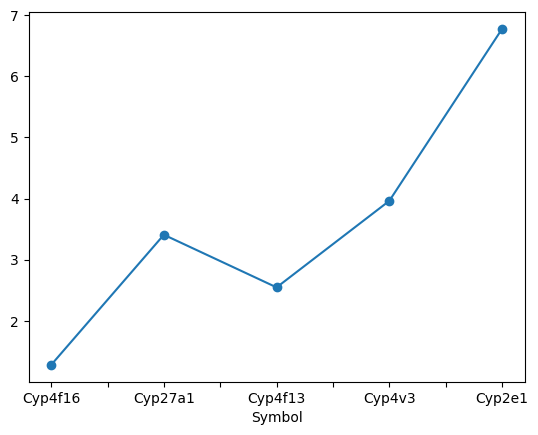

In [32]:
Cyp_DataFrame['LOG2FC'].head(5).plot(kind='line',marker='o')

<Axes: xlabel='Symbol'>

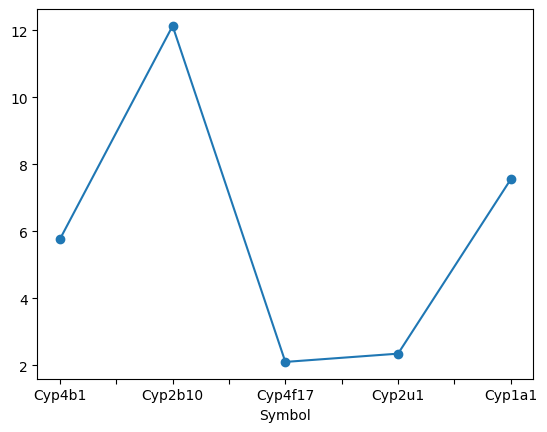

In [33]:
Cyp_DataFrame['LOG2FC'].iloc[6:11].plot(kind='line',marker='o')


<Axes: xlabel='Symbol'>

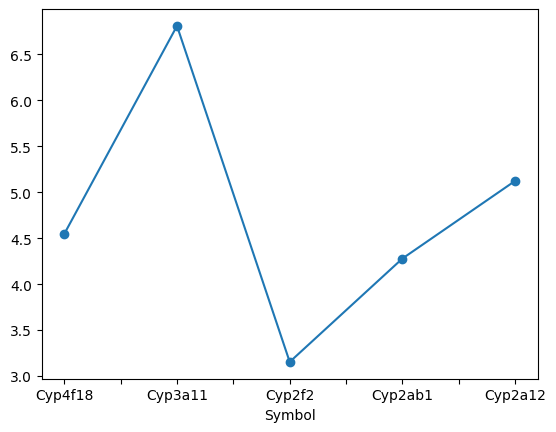

In [34]:
Cyp_DataFrame['LOG2FC'].iloc[11:16].plot(kind='line',marker='o')


<Axes: xlabel='Symbol'>

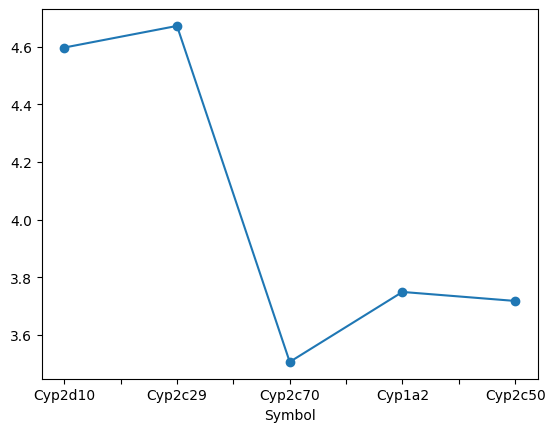

In [35]:
Cyp_DataFrame['LOG2FC'].iloc[16:21].plot(kind='line',marker='o')


<Axes: xlabel='Symbol'>

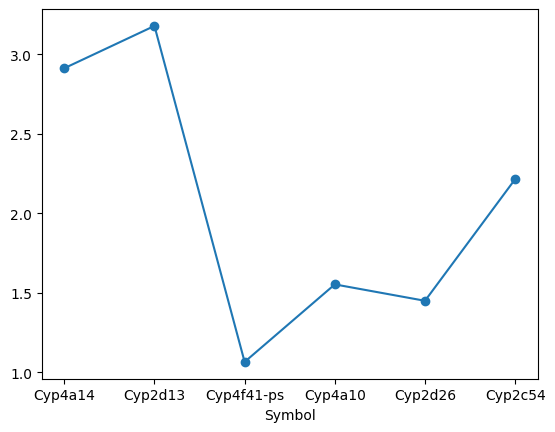

In [36]:
Cyp_DataFrame['LOG2FC'].iloc[21:28].plot(kind='line',marker='o')


<Axes: xlabel='Symbol'>

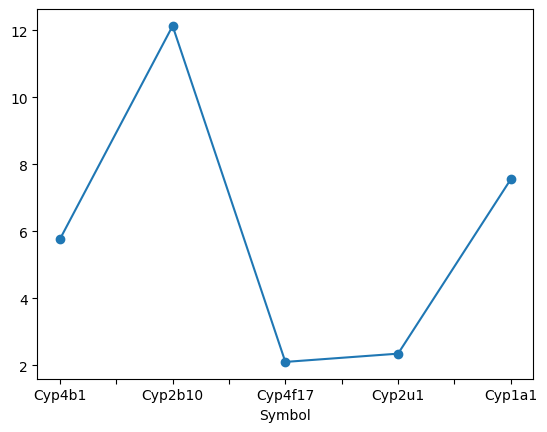

In [37]:
Cyp_DataFrame['LOG2FC'].iloc[6:11].plot(kind='line',marker='o')


In [38]:
a=[]
for i in range(0,Cyp_DataFrame.shape[0]):
    if Cyp_DataFrame['-LOG10_ADJP'][i]>1.30 and Cyp_DataFrame['LOG2FC'][i]<-1:
        a.append(1)
    elif Cyp_DataFrame['-LOG10_ADJP'][i]<=1.30 and Cyp_DataFrame['LOG2FC'][i]<=1:
        a.append(0)
    elif Cyp_DataFrame['-LOG10_ADJP'][i]>1.30 and Cyp_DataFrame['LOG2FC'][i]>1:

        a.append(2)
    else:
        a.append(0)
    

C:\Users\Akshat\AppData\Local\Temp\ipykernel_21864\1720115253.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if Cyp_DataFrame['-LOG10_ADJP'][i]>1.30 and Cyp_DataFrame['LOG2FC'][i]<-1:
C:\Users\Akshat\AppData\Local\Temp\ipykernel_21864\1720115253.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif Cyp_DataFrame['-LOG10_ADJP'][i]<=1.30 and Cyp_DataFrame['LOG2FC'][i]<=1:
C:\Users\Akshat\AppData\Local\Temp\ipykernel_21864\1720115253.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

In [39]:
a=[]
for i in range(0,df.shape[0]):
    if df['-LOG10_ADJP'][i]>1.30 and df['LOG2FC'][i]<-1:
        a.append(1)
    elif df['-LOG10_ADJP'][i]<=1.30 and df['LOG2FC'][i]<=1:
        a.append(0)
    elif df['-LOG10_ADJP'][i]>1.30 and df['LOG2FC'][i]>1:

        a.append(2)
    else:
        a.append(0)
    

In [40]:
df['Class']=a

Text(0, 0.5, '-LOG10_ADJP')

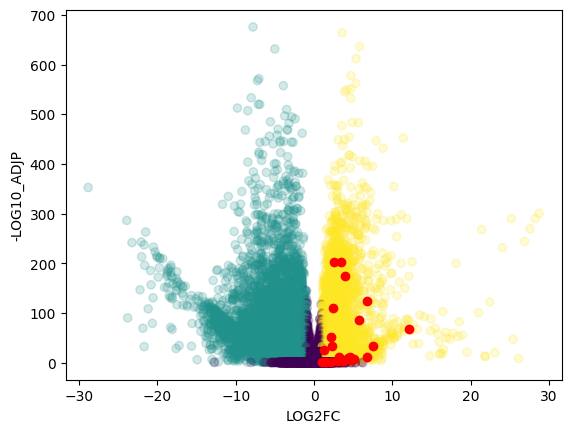

In [41]:
plt.scatter(x=df['LOG2FC'],y=df['-LOG10_ADJP'],alpha=0.2,c=df['Class'])
plt.scatter(x=Cyp_DataFrame['LOG2FC'],y=Cyp_DataFrame['-LOG10_ADJP'], color= 'red')
plt.xlabel('LOG2FC')
plt.ylabel('-LOG10_ADJP')

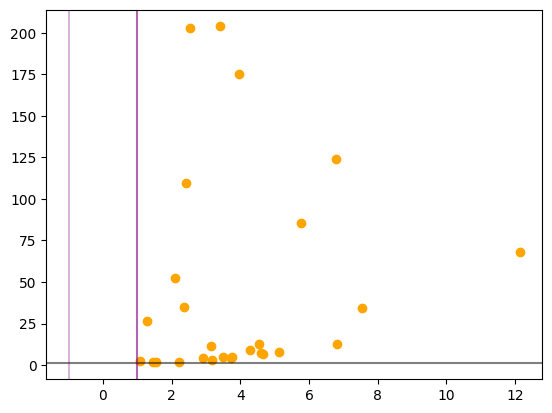

In [42]:
plt.scatter(x=Cyp_DataFrame['LOG2FC'],y=Cyp_DataFrame['-LOG10_ADJP'], color= 'orange')
plt.axhline(1.30,color='black',alpha=0.5)
plt.axvline(1.0,color='purple',alpha=0.6)
plt.axvline(-1.0,color='purple',alpha=0.3)


In [43]:
heatmap_cyp=pd.DataFrame(columns=Cyp_DataFrame.index,index=Cyp_DataFrame.index)

In [44]:
Cyp_DataFrame.shape

(27, 6)

In [45]:
heatmap_cyp

Symbol,Cyp4f16,Cyp27a1,Cyp4f13,Cyp4v3,Cyp2e1,Cyp2d22,Cyp4b1,Cyp2b10,Cyp4f17,Cyp2u1,...,Cyp2c29,Cyp2c70,Cyp1a2,Cyp2c50,Cyp4a14,Cyp2d13,Cyp4f41-ps,Cyp4a10,Cyp2d26,Cyp2c54
Symbol,,,,,,,,,,,,,,,,,,,,,
Cyp4f16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cyp27a1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cyp4f13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cyp4v3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cyp2e1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cyp2d22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cyp4b1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cyp2b10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cyp4f17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
for i in range(Cyp_DataFrame.shape[0]):
    l=[]
    for j in range(Cyp_DataFrame.shape[0]):
        l.append((abs(Cyp_DataFrame['SUM'][i]-Cyp_DataFrame['SUM'][j])-150)*-1)
    heatmap_cyp[heatmap_cyp.columns[i]]=l

C:\Users\Akshat\AppData\Local\Temp\ipykernel_21864\2096874176.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  l.append((abs(Cyp_DataFrame['SUM'][i]-Cyp_DataFrame['SUM'][j])-150)*-1)


In [54]:
import seaborn as sns

Text(0.5, 23.52222222222222, 'Gene')

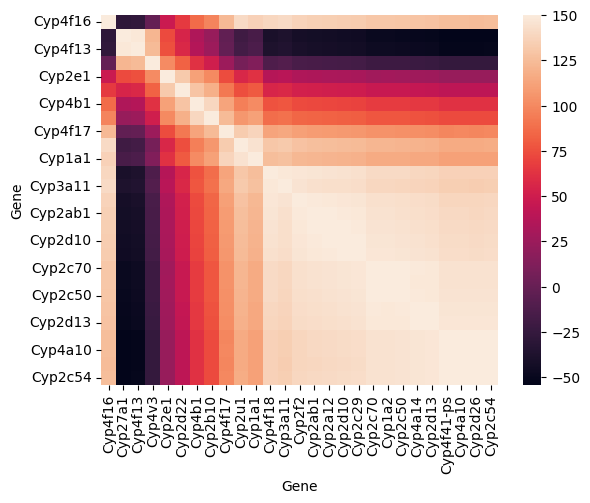

In [56]:
sns.heatmap(heatmap_cyp)
plt.ylabel('Gene')
plt.xlabel('Gene')

In [49]:
df2=pd.read_csv('WT-GC-SF.csv')

In [34]:
df2

,ENSEMBL,Symbol,LOG2FC,PVAL,ADJP
0,ENSMUSG00000011118,Panx3,19.101743,2.512807e-11,5.843195e-09
1,ENSMUSG00000013418,B4galnt2,-15.255694,4.069233e-15,1.007690e-12
2,ENSMUSG00000028834,Trim63,-11.926390,1.512613e-14,3.650951e-12
3,ENSMUSG00000030827,Fgf21,-4.566293,2.979864e-15,7.476321e-13
4,ENSMUSG00000031383,Dusp9,-9.322874,7.276249e-14,1.734294e-11
...,...,...,...,...,...
34456,ENSMUSG00002076907,NaN,0.000000,1.000000e+00,NaN
34457,ENSMUSG00002076945,NaN,0.000000,1.000000e+00,NaN
34458,ENSMUSG00002076957,NaN,0.000000,1.000000e+00,NaN
34459,ENSMUSG00002076967,NaN,0.000000,1.000000e+00,NaN


In [35]:
df2['-LOG10_ADJP']=-np.log(df2['ADJP'])

In [36]:
df2

,ENSEMBL,Symbol,LOG2FC,PVAL,ADJP,-LOG10_ADJP
0,ENSMUSG00000011118,Panx3,19.101743,2.512807e-11,5.843195e-09,18.957988
1,ENSMUSG00000013418,B4galnt2,-15.255694,4.069233e-15,1.007690e-12,27.623361
2,ENSMUSG00000028834,Trim63,-11.926390,1.512613e-14,3.650951e-12,26.336033
3,ENSMUSG00000030827,Fgf21,-4.566293,2.979864e-15,7.476321e-13,27.921865
4,ENSMUSG00000031383,Dusp9,-9.322874,7.276249e-14,1.734294e-11,24.777836
...,...,...,...,...,...,...
34456,ENSMUSG00002076907,NaN,0.000000,1.000000e+00,NaN,NaN
34457,ENSMUSG00002076945,NaN,0.000000,1.000000e+00,NaN,NaN
34458,ENSMUSG00002076957,NaN,0.000000,1.000000e+00,NaN,NaN
34459,ENSMUSG00002076967,NaN,0.000000,1.000000e+00,NaN,NaN


In [37]:
r=[]
for i in range(0,df2.shape[0]):
    if df2['-LOG10_ADJP'][i]>1.30 and df2['LOG2FC'][i]<-1:
        r.append(1)
    elif df2['-LOG10_ADJP'][i]<=1.30 and df2['LOG2FC'][i]<=1:
        r.append(0)
    elif df2['-LOG10_ADJP'][i]>1.30 and df2['LOG2FC'][i]>1:

        r.append(2)
    else:
        r.append(0)
    

In [38]:
df2['Class']=r

In [39]:
df2

,ENSEMBL,Symbol,LOG2FC,PVAL,ADJP,-LOG10_ADJP,Class
0,ENSMUSG00000011118,Panx3,19.101743,2.512807e-11,5.843195e-09,18.957988,2
1,ENSMUSG00000013418,B4galnt2,-15.255694,4.069233e-15,1.007690e-12,27.623361,1
2,ENSMUSG00000028834,Trim63,-11.926390,1.512613e-14,3.650951e-12,26.336033,1
3,ENSMUSG00000030827,Fgf21,-4.566293,2.979864e-15,7.476321e-13,27.921865,1
4,ENSMUSG00000031383,Dusp9,-9.322874,7.276249e-14,1.734294e-11,24.777836,1
...,...,...,...,...,...,...,...
34456,ENSMUSG00002076907,NaN,0.000000,1.000000e+00,NaN,NaN,0
34457,ENSMUSG00002076945,NaN,0.000000,1.000000e+00,NaN,NaN,0
34458,ENSMUSG00002076957,NaN,0.000000,1.000000e+00,NaN,NaN,0
34459,ENSMUSG00002076967,NaN,0.000000,1.000000e+00,NaN,NaN,0


Text(0, 0.5, '-LOG10_ADJP')

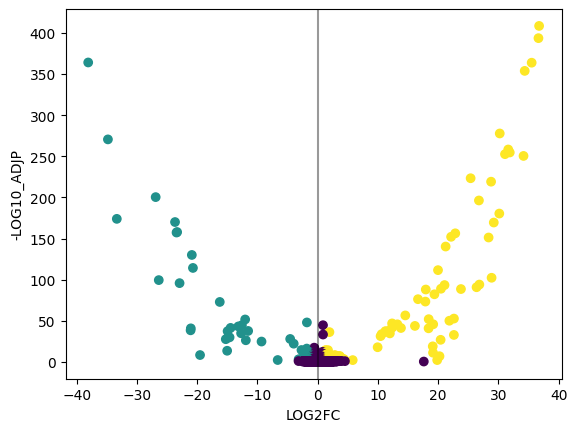

In [40]:
plt.scatter(x=df2['LOG2FC'],y=df2['-LOG10_ADJP'],c=df2['Class'])
plt.axvline(0,color='black',alpha=0.4)
plt.xlabel('LOG2FC')
plt.ylabel('-LOG10_ADJP')

C:\Users\Akshat\AppData\Local\Temp\ipykernel_17564\3139143234.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Class'])


<Axes: xlabel='Class', ylabel='Density'>

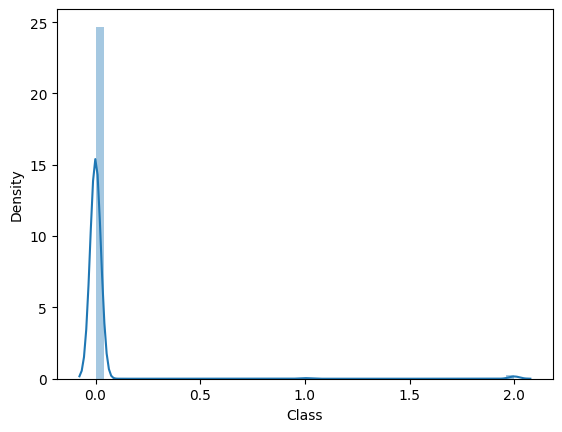

In [41]:
sns.distplot(df2['Class'])

In [42]:
df2['Class'].value_counts()

Class
0    34020
2      349
1       92
Name: count, dtype: int64

In [43]:
df3=pd.read_csv('Nrf2KO-GC-SF.csv')

In [44]:
df3

,ENSEMBL,Symbol,LOG2FC,PVAL,ADJP
0,ENSMUSG00000004038,Gstm3,2.195757,4.256123e-13,9.437394e-11
1,ENSMUSG00000006517,Mvd,1.745904,6.244432e-14,1.429771e-11
2,ENSMUSG00000010025,Aldh3a2,-0.666981,4.850842e-11,8.586806e-09
3,ENSMUSG00000018042,Cyb5r3,0.590397,7.276408e-13,1.580181e-10
4,ENSMUSG00000020776,Fbf1,-1.550111,3.209261e-12,6.563407e-10
...,...,...,...,...,...
34456,ENSMUSG00002076954,NaN,0.000000,1.000000e+00,NaN
34457,ENSMUSG00002076957,NaN,0.000000,1.000000e+00,NaN
34458,ENSMUSG00002076967,NaN,0.000000,1.000000e+00,NaN
34459,ENSMUSG00002076968,NaN,0.000000,1.000000e+00,NaN


In [45]:
df3['-LOG10_ADJP']=-np.log(df3['ADJP'])

In [46]:
r=[]
for i in range(0,df3.shape[0]):
    if df3['-LOG10_ADJP'][i]>1.30 and df3['LOG2FC'][i]<-1:
        r.append(1)
    elif df3['-LOG10_ADJP'][i]<=1.30 and df3['LOG2FC'][i]<=1:
        r.append(0)
    elif df3['-LOG10_ADJP'][i]>1.30 and df3['LOG2FC'][i]>1:

        r.append(2)
    else:
        r.append(0)
    

In [47]:
df3['Class']=r

Text(0, 0.5, '-LOG10_ADJP')

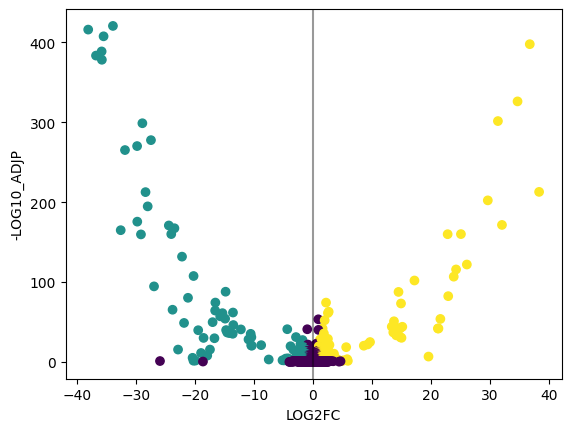

In [48]:
plt.scatter(x=df3['LOG2FC'],y=df3['-LOG10_ADJP'],c=df3['Class'])
plt.axvline(0,color='black',alpha=0.4)
plt.xlabel('LOG2FC')
plt.ylabel('-LOG10_ADJP')

In [49]:
df3['Class'].value_counts()

Class
0    33972
2      285
1      204
Name: count, dtype: int64

C:\Users\Akshat\AppData\Local\Temp\ipykernel_17564\3905919994.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['Class'])


<Axes: xlabel='Class', ylabel='Density'>

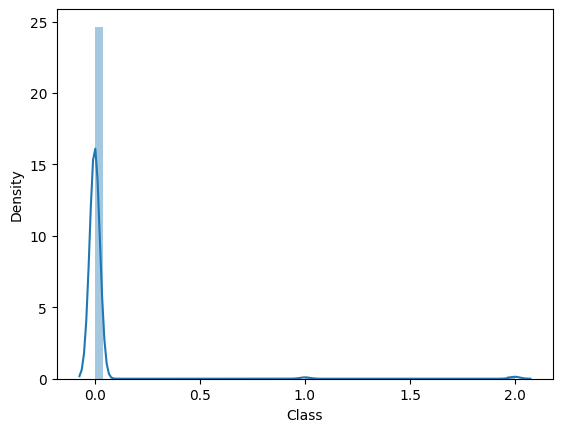

In [50]:
sns.distplot(df3['Class'])

<Axes: xlabel='Class', ylabel='count'>

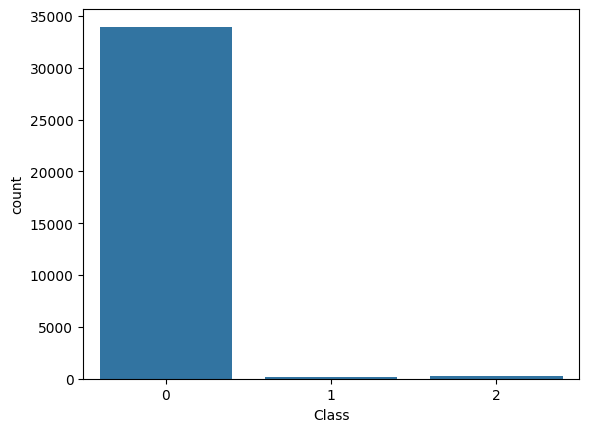

In [51]:
sns.barplot(df3['Class'].value_counts())

<Axes: xlabel='Class'>

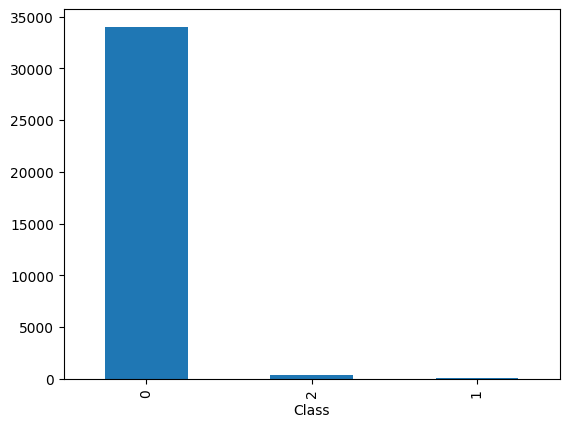

In [52]:
df2['Class'].value_counts().plot(kind='bar')

In [53]:
cyp_indices = df2[df2['Symbol'].str[:3] == 'Cyp'].index.to_list()

In [54]:
Cyp_WT=df2.iloc[cyp_indices]


In [55]:
Cyp_WT

,ENSEMBL,Symbol,LOG2FC,PVAL,ADJP,-LOG10_ADJP,Class
159,ENSMUSG00000039519,Cyp7b1,1.075273,0.000010,0.001284,6.658137,2
229,ENSMUSG00000015224,Cyp2j9,-0.749171,0.000100,0.008525,4.764700,0
251,ENSMUSG00000074254,Cyp2a4,4.030309,0.000147,0.011431,4.471462,2
272,ENSMUSG00000025002,Cyp2c55,1.837703,0.000216,0.015477,4.168387,2
286,ENSMUSG00000049439,Cyp20a1,0.457262,0.000280,0.019089,3.958631,0
...,...,...,...,...,...,...,...
28029,ENSMUSG00000081225,Cyp2j12,0.000000,1.000000,NaN,NaN,0
28050,ENSMUSG00000081362,Cyp2j7,0.000000,1.000000,NaN,NaN,0
28354,ENSMUSG00000084286,Cyp2j15-ps,0.000000,1.000000,NaN,NaN,0
28886,ENSMUSG00000086896,Cyp4x1os,0.000000,1.000000,NaN,NaN,0


In [56]:
mask1=Cyp_WT['LOG2FC']>1
mask2=Cyp_WT['-LOG10_ADJP']>=1.300000000000001

In [57]:
CYP_WT_DF=Cyp_WT[mask1&mask2]

In [58]:
CYP_WT_DF

,ENSEMBL,Symbol,LOG2FC,PVAL,ADJP,-LOG10_ADJP,Class
159,ENSMUSG00000039519,Cyp7b1,1.075273,0.000010,0.001284,6.658137,2
251,ENSMUSG00000074254,Cyp2a4,4.030309,0.000147,0.011431,4.471462,2
272,ENSMUSG00000025002,Cyp2c55,1.837703,0.000216,0.015477,4.168387,2
838,ENSMUSG00000003555,Cyp17a1,1.171544,0.006060,0.141437,1.955899,2


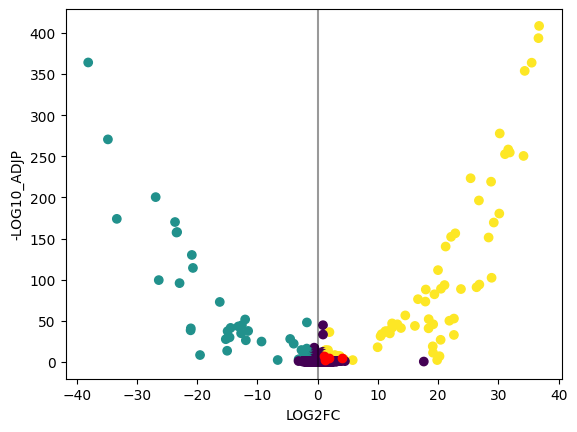

In [59]:
plt.scatter(x=df2['LOG2FC'],y=df2['-LOG10_ADJP'],c=df2['Class'])
plt.axvline(0,color='black',alpha=0.4)
plt.xlabel('LOG2FC')
plt.ylabel('-LOG10_ADJP')
plt.scatter(x=CYP_WT_DF['LOG2FC'],y=CYP_WT_DF['-LOG10_ADJP'],color='Red')

(0.0, 100.0)

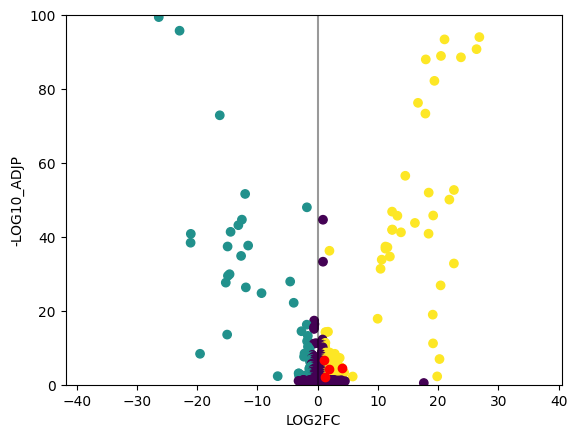

In [60]:
plt.scatter(x=df2['LOG2FC'],y=df2['-LOG10_ADJP'],c=df2['Class'])
plt.axvline(0,color='black',alpha=0.4)
plt.xlabel('LOG2FC')
plt.ylabel('-LOG10_ADJP')
plt.scatter(x=CYP_WT_DF['LOG2FC'],y=CYP_WT_DF['-LOG10_ADJP'],color='Red')
plt.ylim(0,100)

(-2.0, 2.0)

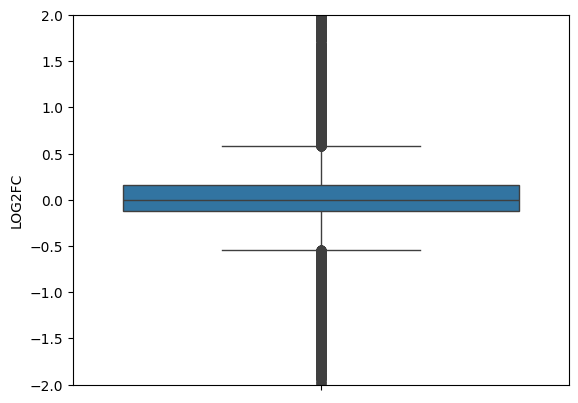

In [62]:
sns.boxplot(df3['LOG2FC'])
plt.ylim(-2,2)